##  **Dataset Source**

We used the [CyberBERT Dataset](https://huggingface.co/datasets/agrawalchaitany/cyberbert_dataset), which is publicly available on Hugging Face .

###  Description:
* The dataset contains a wide range of **network traffic features** used for **cybersecurity threat detection**.
* It includes both **normal (BENIGN)** traffic and **various attack types** such as DoS, PortScan, DDoS, and more.
* Each row represents a network flow with detailed statistical features (e.g., packet length, flow duration, header size).

###  Access Method:
* We loaded the dataset directly using the  `datasets` library in Python:
```python
from datasets import load_dataset
dataset = load_dataset("agrawalchaitany/cyberbert_dataset")

In [1]:
import pandas as pd
from datasets import load_dataset
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

dataset = load_dataset("agrawalchaitany/cyberbert_dataset")

/Users/rahafmasmali/.pyenv/versions/tf-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **1. Data Handling**



## Data Cleaning and Preprocessing



###  **Dealing with Missing or Redundant Features**

To ensure that only meaningful features are included in our model, we examined the dataset for missing values, duplicated features, and uninformative columns.

We performed a correlation analysis and identified several pairs of features with a perfect correlation of 1.0. After comparing them directly, we found that some were completely identical — containing the exact same values row by row — so we safely dropped the duplicates.

Additionally, some columns contained only zeros or constant values across all rows, making them uninformative for classification. These columns were also removed to reduce noise and simplify the model.


In [2]:
df = dataset['train'].to_pandas()
pd.set_option('display.max_columns', None)

df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Destination Port


In [3]:
df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [4]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [5]:

dos_hulk_df = df[df['Label'] == 'DoS Hulk']

dos_hulk_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2001598,80.0,1878.0,3.0,6.0,382.0,11595.0,382.0,0.0,127.333333,220.547803,4355.0,0.0,1932.500000,2182.468304,6377529.286,4792.332268,234.750000,229.129876,577.0,15.0,975.0,487.500000,265.165043,675.0,300.0,1780.0,356.000000,399.788069,950.0,15.0,0.0,0.0,0.0,0.0,104.0,200.0,1597.444089,3194.888179,0.0,4355.0,1197.700000,1886.332364,3558249.789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1330.777778,127.333333,1932.500000,104.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,382.0,6.0,11595.0,29200.0,235.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
2001599,80.0,1550.0,3.0,6.0,372.0,11595.0,372.0,0.0,124.000000,214.774300,5792.0,0.0,1932.500000,2537.820147,7720645.161,5806.451613,193.750000,262.939836,658.0,3.0,669.0,334.500000,402.343758,619.0,50.0,1503.0,300.600000,366.313800,742.0,3.0,0.0,0.0,0.0,0.0,104.0,200.0,1935.483871,3870.967742,0.0,5792.0,1196.700000,2119.419944,4491940.900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1329.666667,124.000000,1932.500000,104.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,372.0,6.0,11595.0,29200.0,235.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
2001600,80.0,497.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000,8048.289738,165.666667,153.206832,304.0,1.0,497.0,165.666667,153.206832,304.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,8048.289738,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,128.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,251.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
2001601,80.0,1893.0,3.0,7.0,348.0,11595.0,348.0,0.0,116.000000,200.917894,4344.0,0.0,1656.428571,1760.597234,6309033.281,5282.620180,210.333333,237.859202,769.0,3.0,967.0,483.500000,584.777308,897.0,70.0,1765.0,294.166667,351.901928,956.0,3.0,0.0,0.0,0.0,0.0,104.0,232.0,1584.786054,3697.834126,0.0,4344.0,1085.727273,1579.834427,2495876.818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1194.300000,116.000000,1656.428571,104.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,348.0,7.0,11595.0,29200.0,235.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
2001602,80.0,1942.0,3.0,6.0,351.0,11595.0,351.0,0.0,117.000000,202.649945,5803.0,0.0,1932.500000,2539.075088,6151390.319,4634.397528,242.750000,457.036025,1348.0,2.0,1455.0,727.500000,939.744912,1392.0,63.0,1898.0,379.600000,625.954711,1477.0,2.0,0.0,0.0,0.0,0.0,104.0,200.0,1544.799176,3089.598352,0.0,5803.0,1194.600000,2121.172590,4499373.156,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1327.333333,117.000000,1932.500000,104.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,351.0,6.0,11595.0,29200.0,235.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk


In [6]:
duplicates = df.duplicated().sum()
print(f"duplicat: {duplicates}")

duplicat: 0


In [7]:
df[['Total Fwd Packets', 'Total Length of Fwd Packets']].corr()

,Total Fwd Packets,Total Length of Fwd Packets
Total Fwd Packets,1.00000,0.36551
Total Length of Fwd Packets,0.36551,1.00000


In [8]:
df[['Subflow Bwd Bytes', 'Total Length of Bwd Packets']].corr()

,Subflow Bwd Bytes,Total Length of Bwd Packets
Subflow Bwd Bytes,1.0,1.0
Total Length of Bwd Packets,1.0,1.0


In [9]:
#we need to delet one of them 	Fwd Packet Length Mean  or Avg Fwd Segment Size	

df[['Fwd Packet Length Mean', 'Avg Fwd Segment Size', 'Average Packet Size']].corr()

,Fwd Packet Length Mean,Avg Fwd Segment Size,Average Packet Size
Fwd Packet Length Mean,1.000000,1.000000,0.299532
Avg Fwd Segment Size,1.000000,1.000000,0.299532
Average Packet Size,0.299532,0.299532,1.000000


In [10]:
df[
    ['Fwd Header Length', 'Fwd Header Length.1',
     'Total Length of Fwd Packets', 'Subflow Fwd Bytes',
     'Packet Length Mean', 'Average Packet Size',
     'Packet Length Variance', 'Packet Length Std',
     'Fwd Packet Length Mean', 'Avg Fwd Segment Size']
].corr()



,Fwd Header Length,Fwd Header Length.1,Total Length of Fwd Packets,Subflow Fwd Bytes,Packet Length Mean,Average Packet Size,Packet Length Variance,Packet Length Std,Fwd Packet Length Mean,Avg Fwd Segment Size
Fwd Header Length,1.000000,1.000000,-0.001338,-0.001339,0.000508,0.000545,0.000418,0.000642,-0.000056,-0.000056
Fwd Header Length.1,1.000000,1.000000,-0.001338,-0.001339,0.000508,0.000545,0.000418,0.000642,-0.000056,-0.000056
Total Length of Fwd Packets,-0.001338,-0.001338,1.000000,0.999999,0.081365,0.076025,0.033850,0.057367,0.185073,0.185073
Subflow Fwd Bytes,-0.001339,-0.001339,0.999999,1.000000,0.081472,0.076126,0.033896,0.057445,0.185317,0.185317
Packet Length Mean,0.000508,0.000508,0.081365,0.081472,1.000000,0.997822,0.805559,0.942703,0.297478,0.297478
Average Packet Size,0.000545,0.000545,0.076025,0.076126,0.997822,1.000000,0.816780,0.943132,0.299532,0.299532
Packet Length Variance,0.000418,0.000418,0.033850,0.033896,0.805559,0.816780,1.000000,0.924930,0.211705,0.211705
Packet Length Std,0.000642,0.000642,0.057367,0.057445,0.942703,0.943132,0.924930,1.000000,0.279416,0.279416
Fwd Packet Length Mean,-0.000056,-0.000056,0.185073,0.185317,0.297478,0.299532,0.211705,0.279416,1.000000,1.000000
Avg Fwd Segment Size,-0.000056,-0.000056,0.185073,0.185317,0.297478,0.299532,0.211705,0.279416,1.000000,1.000000


In [11]:
df_numeric = df.drop(columns=['Label'])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_numeric.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.171828,-0.004652,-0.004356,0.009611,-0.003388,0.090989,-0.047160,0.136916,0.123060,-0.212699,-0.262417,-0.238842,-0.190515,0.070287,0.359537,-0.113636,-0.131931,-0.130869,-0.023383,-0.171004,-0.107032,-0.111044,-0.129597,-0.055521,-0.119856,-0.075871,-0.041670,-0.061670,-0.055113,0.234993,NaN,0.004445,NaN,0.000457,0.000761,0.348251,0.143760,-0.255221,-0.143499,-0.171428,-0.139519,-0.077536,-0.036841,0.234993,-0.007134,-0.217887,0.585195,0.523381,0.004445,-0.007044,0.027562,-0.172832,0.136916,-0.238842,0.000457,NaN,NaN,NaN,NaN,NaN,NaN,-0.004652,0.009624,-0.004356,-0.003388,-0.133049,0.206231,-0.003543,0.001003,-0.040678,-0.048227,-0.058142,-0.027193,-0.127989,0.006732,-0.123677,-0.129539
Flow Duration,-0.171828,1.000000,0.020571,0.019389,0.063509,0.015998,0.263401,-0.115716,0.134033,0.224957,0.485858,-0.238692,0.448503,0.433671,-0.024982,-0.109900,0.534831,0.734884,0.779979,0.060566,0.998529,0.543119,0.721063,0.779716,0.209850,0.819887,0.408650,0.517722,0.580336,0.212795,-0.017047,NaN,-0.002651,NaN,-0.000097,-0.001049,-0.099488,-0.080348,-0.247385,0.501514,0.417241,0.445197,0.271962,0.217883,-0.017047,0.008075,0.179773,0.033256,-0.117224,-0.002651,0.008023,-0.165840,0.394800,0.134033,0.448503,-0.000097,NaN,NaN,NaN,NaN,NaN,NaN,0.020571,0.063592,0.019389,0.015998,0.094089,-0.034352,0.015728,-0.001236,0.184985,0.238497,0.289933,0.117259,0.764124,0.240369,0.775744,0.734123
Total Fwd Packets,-0.004652,0.020571,1.000000,0.999070,0.365510,0.996993,0.009071,-0.003255,-0.000262,0.001110,0.022552,-0.006068,0.021123,0.006045,0.000391,-0.002342,-0.001366,-0.000954,0.001862,-0.000589,0.020240,-0.001361,-0.000333,0.001418,-0.001290,0.023794,-0.000883,0.000475,0.003095,-0.001144,0.001882,NaN,-0.000059,NaN,0.000476,0.013750,-0.002132,-0.001655,-0.006792,0.021735,0.024239,0.011654,0.005141,-0.001337,0.001882,0.000339,0.007061,0.001378,-0.003794,-0.000059,0.000337,0.000882,0.021865,-0.000262,0.021123,0.000476,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.365992,0.999070,0.996987,0.003729,-0.000658,0.887386,-0.000181,0.039822,0.008207,0.030318,0.041186,0.001402,0.000676,0.001483,0.001266
Total Backward Packets,-0.004356,0.019389,0.999070,1.000000,0.359457,0.994430,0.008764,-0.002834,-0.000617,0.000743,0.022342,-0.005343,0.021244,0.005722,0.000335,-0.002383,-0.001711,-0.001426,0.001406,-0.000615,0.019040,-0.001541,-0.000860,0.000947,-0.001160,0.023219,-0.001039,0.000272,0.003177,-0.001100,0.001673,NaN,-0.000061,NaN,0.000757,0.013766,-0.002231,-0.001369,-0.006152,0.021469,0.024655,0.011508,0.005111,-0.001183,0.001673,0.000214,0.006490,0.001203,-0.003151,-0.000061,0.000213,0.003279,0.022290,-0.000617,0.021244,0.000757,NaN,NaN,NaN,NaN,NaN,NaN,0.999070,0

In [12]:
df_numeric = df.drop(columns=['Label'])

corr_matrix = df_numeric.corr()

perfect_corr_rows = []

for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and corr_matrix.loc[col1, col2] == 1.0:
            pair = tuple(sorted((col1, col2)))  
            perfect_corr_rows.append(pair)

perfect_corr_unique = list(set(perfect_corr_rows))

perfect_corr_df = pd.DataFrame(perfect_corr_unique, columns=["Feature 1", "Feature 2"])
perfect_corr_df["Correlation"] = 1.0

perfect_corr_df

,Feature 1,Feature 2,Correlation
0,CWE Flag Count,Fwd URG Flags,1.0
1,Subflow Bwd Packets,Total Backward Packets,1.0
2,Fwd PSH Flags,SYN Flag Count,1.0
3,Fwd Header Length,Fwd Header Length.1,1.0
4,Avg Fwd Segment Size,Fwd Packet Length Mean,1.0
5,Subflow Fwd Packets,Total Fwd Packets,1.0


In [13]:
#delet
df['Bwd PSH Flags'].value_counts()

Bwd PSH Flags
0.0    2522362
Name: count, dtype: int64

In [14]:
# delet
df['Bwd URG Flags'].value_counts()

Bwd URG Flags
0.0    2522362
Name: count, dtype: int64

In [15]:
#we need to delet them
bulk_columns = [
    'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'
]

for col in bulk_columns:
    print(df[col].value_counts())  

Fwd Avg Bytes/Bulk
0.0    2522362
Name: count, dtype: int64
Fwd Avg Packets/Bulk
0.0    2522362
Name: count, dtype: int64
Fwd Avg Bulk Rate
0.0    2522362
Name: count, dtype: int64
Bwd Avg Bytes/Bulk
0.0    2522362
Name: count, dtype: int64
Bwd Avg Packets/Bulk
0.0    2522362
Name: count, dtype: int64
Bwd Avg Bulk Rate
0.0    2522362
Name: count, dtype: int64


In [16]:
bad_rows = df[
    (df["Flow Bytes/s"].isin([np.inf, -np.inf])) |
    (df["Flow Packets/s"].isin([np.inf, -np.inf])) |
    (df["Flow Bytes/s"].isna()) |
    (df["Flow Packets/s"].isna())
]

print(bad_rows['Label'].value_counts())

Label
BENIGN         1427
PortScan        125
Bot               5
DoS Hulk          3
DDoS              2
FTP-Patator       2
Name: count, dtype: int64


In [17]:
"""
Checking for exact equality between pairs of features that showed perfect correlation (1.0).
This step helps verify whether the features are truly duplicates (identical values row by row)
or just mathematically correlated (e.g., multiples or derived values).
If the result is True, the features are completely identical and one of them can be safely dropped.
"""

print(" Subflow Bwd Packets == Total Backward Packets:", 
      (df['Subflow Bwd Packets'] == df['Total Backward Packets']).all())

print(" Fwd PSH Flags == SYN Flag Count:", 
      (df['Fwd PSH Flags'] == df['SYN Flag Count']).all())

print("CWE Flag Count == Fwd URG Flags:", 
      (df['CWE Flag Count'] == df['Fwd URG Flags']).all())

print(" Subflow Fwd Packets == Total Fwd Packets:", 
      (df['Subflow Fwd Packets'] == df['Total Fwd Packets']).all())

print(" Fwd Header Length == Fwd Header Length.1:", 
      (df['Fwd Header Length'] == df['Fwd Header Length.1']).all())

print(" Avg Fwd Segment Size == Fwd Packet Length Mean:", 
      (df['Avg Fwd Segment Size'] == df['Fwd Packet Length Mean']).all())

 Subflow Bwd Packets == Total Backward Packets: True
 Fwd PSH Flags == SYN Flag Count: True
CWE Flag Count == Fwd URG Flags: True
 Subflow Fwd Packets == Total Fwd Packets: True
 Fwd Header Length == Fwd Header Length.1: True
 Avg Fwd Segment Size == Fwd Packet Length Mean: False


### **Dealing with nagative values**



After exploring the dataset, we found that some numeric features contained negative values, which are logically incorrect in this context—such as negative time durations, speeds, or packet sizes. These values were mostly found in the `BENIGN` class, which dominates the dataset with over 2 million samples.

To ensure clean and reliable data, we decided to remove all rows that had negative values in the following columns:
`Flow Duration`, `Flow Bytes/s`, `Flow Packets/s`, `Flow IAT Mean`, `Flow IAT Max`, `Flow IAT Min`, `Fwd IAT Min`, `Fwd Header Length`, `Bwd Header Length`, and `min_seg_size_forward`.

For the column `Init_Win_bytes_forward`, we observed that more than 99% of its negative values appeared only in benign traffic. This made it non-informative and noisy for classification, so we removed both its negative rows and the column itself.

However, we kept the column `Init_Win_bytes_backward` because its negative values were more meaningfully distributed across both benign and attack labels—particularly DoS and DDoS attacks. We believe this variation might help the model learn useful patterns related to malicious activity.

In [18]:
negative_counts = {}

for col in df.select_dtypes(include='number').columns:
    count = (df[col] < 0).sum()
    if count > 0:
        negative_counts[col] = count


print(" Nagative values:")
for col, count in negative_counts.items():
    print(f"{col}: {count}")

 Nagative values:
Flow Duration: 107
Flow Bytes/s: 78
Flow Packets/s: 107
Flow IAT Mean: 107
Flow IAT Max: 107
Flow IAT Min: 2881
Fwd IAT Min: 17
Fwd Header Length: 35
Bwd Header Length: 22
Fwd Header Length.1: 35
Init_Win_bytes_forward: 911027
Init_Win_bytes_backward: 1216341
min_seg_size_forward: 35


In [19]:
negative_cols = [
    'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s',
    'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Min',
    'Fwd Header Length', 'Bwd Header Length', 'min_seg_size_forward'
]

for col in negative_cols:
    
    print(f" Column: '{col}'")

    negative_rows = df[df[col] < 0]
    print(f"→ Total negative values: {len(negative_rows)}")
  
    if not negative_rows.empty:
        label_dist = negative_rows['Label'].value_counts()
        for label, count in label_dist.items():
            print(f"   - {label}: {count}")
    else:
        print("   - No negative values found.")

 Column: 'Flow Duration'
→ Total negative values: 107
   - BENIGN: 107
 Column: 'Flow Bytes/s'
→ Total negative values: 78
   - BENIGN: 78
 Column: 'Flow Packets/s'
→ Total negative values: 107
   - BENIGN: 107
 Column: 'Flow IAT Mean'
→ Total negative values: 107
   - BENIGN: 107
 Column: 'Flow IAT Max'
→ Total negative values: 107
   - BENIGN: 107
 Column: 'Fwd IAT Min'
→ Total negative values: 17
   - DoS Hulk: 8
   - DDoS: 6
   - DoS GoldenEye: 3
 Column: 'Fwd Header Length'
→ Total negative values: 35
   - BENIGN: 35
 Column: 'Bwd Header Length'
→ Total negative values: 22
   - BENIGN: 22
 Column: 'min_seg_size_forward'
→ Total negative values: 35
   - BENIGN: 35


In [20]:
negative_rows_iat_min = df[df['Flow IAT Min'] < 0]

label_distribution = negative_rows_iat_min['Label'].value_counts()
print("🔍 Column: 'Flow IAT Min'")
print(f"→ Total negative values: {len(negative_rows_iat_min)}")
print("→ Label distribution:\n", label_distribution)

🔍 Column: 'Flow IAT Min'
→ Total negative values: 2881
→ Label distribution:
 Label
BENIGN           2688
DoS Hulk          158
DDoS               19
DoS GoldenEye       5
FTP-Patator         4
Heartbleed          4
SSH-Patator         2
Infiltration        1
Name: count, dtype: int64


In [21]:
# Define the columns where negative values are considered invalid
columns_to_clean = [
    'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s',
    'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'min_seg_size_forward'
]

# Remove rows that contain negative values in any of these columns
df = df[~(df[columns_to_clean] < 0).any(axis=1)]

In [22]:
"""
 Decision:

We decided to remove the column 'Init_Win_bytes_forward' because:
- Over 99% of its negative values occur in BENIGN traffic only.
- It does not help distinguish between normal and attack traffic.
- It adds noise and unnecessary complexity to the model without contributing valuable information.

On the other hand, we chose to keep  the column 'Init_Win_bytes_backward' because:
- Although it also contains many negative values, these appear across both BENIGN and various attack types.
- This variation may provide useful signals for classification, especially in detecting DoS and DDoS behaviors.
"""

cols_to_check = ['Init_Win_bytes_forward', 'Init_Win_bytes_backward']

for col in cols_to_check:
    print("="*60)
    print(f" Column: '{col}' — Negative Values per Label:")
    
    neg_rows = df[df[col] < 0]
    print(neg_rows['Label'].value_counts())

 Column: 'Init_Win_bytes_forward' — Negative Values per Label:
Label
BENIGN      910969
PortScan         7
Name: count, dtype: int64
 Column: 'Init_Win_bytes_backward' — Negative Values per Label:
Label
BENIGN              1153016
DDoS                  46524
DoS Hulk               9234
DoS Slowhttptest       3145
DoS GoldenEye          2572
DoS slowloris          1639
PortScan                 64
FTP-Patator              64
Web Attack � XSS         17
SSH-Patator              12
Infiltration              3
Name: count, dtype: int64


## Removed Features


In [23]:
# Dropping the column 'Fwd Header Length.1' because it's a duplicate of 'Fwd Header Length'
# It was automatically created when the dataset had two columns with the same name
df.drop(columns=['Fwd Header Length.1'], inplace=True)

# Dropping the column 'Avg Fwd Segment Size' because it has almost identical values to 'Fwd Packet Length Mean'
# Keeping both would be redundant, so we keep only one to reduce feature duplication
df.drop(columns=['Avg Fwd Segment Size'], inplace=True)

# Dropping bulk-related columns because all their values are zero,
df.drop(columns=bulk_columns, inplace=True)


# Dropping 'Bwd PSH Flags' column because it contains only zero or NaN values.
# From both a data and domain perspective, it provides no variance and no distinguishing signal
# between normal and attack traffic.

df.drop(columns=['Bwd PSH Flags'], inplace=True)


# Dropping Bwd URG Flags columns because all their values are zero,
df.drop(columns=['Bwd URG Flags'], inplace=True)


"""
Removing rows that contain NaN or infinite values in 'Flow Bytes/s' or 'Flow Packets/s'.
We checked the label distribution for these rows and found that most of them (1427 out of ~1500)
belong to the 'BENIGN' class, which is the dominant class in the dataset.
Considering the class imbalance, this removal does not significantly affect minority attack classes,
and helps clean up invalid values that could negatively impact model performance.
"""

df = df[
    ~df["Flow Bytes/s"].isin([np.inf, -np.inf]) &
    ~df["Flow Packets/s"].isin([np.inf, -np.inf]) &
    df["Flow Bytes/s"].notna() &
    df["Flow Packets/s"].notna()
]

# Dropping perfectly correlated features based on correlation = 1.0.
# These columns are either exact duplicates or carry redundant information.
# Subflow Bwd Packets is identical to Total Backward Packets
# Fwd PSH Flags has the same values as SYN Flag Count (unexpected, likely tool duplication)
# CWE Flag Count is the same as Fwd URG Flags (likely internal alias)
# Subflow Fwd Packets is identical to Total Fwd Packets
df.drop(columns=[
    'Subflow Bwd Packets',
    'Fwd PSH Flags',
    'CWE Flag Count',
    'Subflow Fwd Packets'
], inplace=True)

df.drop(columns=['Init_Win_bytes_forward'], inplace=True)


df.drop(columns=['Init_Win_bytes_backward'], inplace=True)

In [24]:
df['Label'].value_counts()

Label
BENIGN                        2092335
DoS Hulk                       172688
DDoS                           127995
PortScan                        90694
DoS GoldenEye                   10281
FTP-Patator                      5927
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3217
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       35
Web Attack � Sql Injection         21
Heartbleed                          7
Name: count, dtype: int64

In [25]:
print("Number of columns after cleaning:", df.shape[1])

Number of columns after cleaning: 63


In [26]:
print(df.columns.tolist())

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Bwd Segment Size', 'S

In [27]:
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


In [28]:
negative_counts = {}

for col in df.select_dtypes(include='number').columns:
    count = (df[col] < 0).sum()
    if count > 0:
        negative_counts[col] = count


print(" Nagative values:")
for col, count in negative_counts.items():
    print(f"{col}: {count}")

 Nagative values:


In [29]:
df["Label"].value_counts()

Label
BENIGN                        2092335
DoS Hulk                       172688
DDoS                           127995
PortScan                        90694
DoS GoldenEye                   10281
FTP-Patator                      5927
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3217
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       35
Web Attack � Sql Injection         21
Heartbleed                          7
Name: count, dtype: int64

In [30]:
numeric_df = df.select_dtypes(include='number')


In [31]:
nan_columns = numeric_df.columns[numeric_df.isna().any()]
print(" Columns with missing values (NaN):")
print(nan_columns.tolist() if len(nan_columns) else " No NaN values found.")


constant_columns = numeric_df.columns[numeric_df.nunique() <= 1]
print("\n Columns with constant or duplicate values:")
print(constant_columns.tolist() if len(constant_columns) else " No constant columns found.")

zero_columns = [col for col in numeric_df.columns if (numeric_df[col] == 0).all()]
print("\n Columns with all zeros:")
print(zero_columns if zero_columns else " No all-zero columns found.")

 Columns with missing values (NaN):
 No NaN values found.

 Columns with constant or duplicate values:
 No constant columns found.

 Columns with all zeros:
 No all-zero columns found.


##  Step: Feature Type Identification

In this step, we categorized each column in the dataset based on its values and data type to decide how to preprocess it later.

###  Binary Columns
- Contain only two values: 0 and 1.
- Already encoded → no further processing needed.

###  Multiclass Categorical Columns
- Non-numeric or numeric with a few unique values (less than 15).
- Will need encoding (e.g., One-Hot or Label Encoding).

###  Continuous Columns
- Numeric with many unique values.
- Will require transformations like scaling or log transformation.

In [32]:

binary_cols = []
multiclass_categorical_cols = []
continuous_cols = []

for col in df.columns:
    unique_vals = df[col].dropna().unique()
    num_unique = len(unique_vals)
    
    if df[col].dtype in ['int64', 'float64']:
        if num_unique == 2 and set(unique_vals).issubset({0, 1}):
            binary_cols.append(col)
        elif 2 < num_unique < 15:
            multiclass_categorical_cols.append(col)
        else:
            continuous_cols.append(col)
    else:
     
        multiclass_categorical_cols.append(col)


print(f"Binary Columns ({len(binary_cols)}): {binary_cols}")
print(f"Multiclass Categorical Columns ({len(multiclass_categorical_cols)}): {multiclass_categorical_cols}")
print(f"Continuous Columns ({len(continuous_cols)}): {continuous_cols}")

total_columns = len(binary_cols) + len(multiclass_categorical_cols) + len(continuous_cols)
print(f"\nTotal Columns: {total_columns}")

Binary Columns (8): ['Fwd URG Flags', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count']
Multiclass Categorical Columns (1): ['Label']
Continuous Columns (54): ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 

In [33]:
"""
We selected a set of important destination ports because they are categorical by nature,
and applying scaling to large port numbers wouldn’t make sense.

To handle this:
- We kept only the important ports and grouped all others under 'other'.
- Then, we applied one-hot encoding to convert the port values into binary (0/1) columns.

This allows the model to treat ports as distinct categories instead of continuous numerical values.
"""


important_ports = [21, 22, 23, 25, 53, 80, 110, 111, 135, 139,
                   143, 443, 445, 993, 995, 1723, 3306, 3389, 5900, 8080]

df['Destination Port Encoded'] = df['Destination Port'].apply(lambda x: x if x in important_ports else 'other')

port_dummies = pd.get_dummies(df['Destination Port Encoded'], prefix='Port').astype(int)

df = pd.concat([df.drop(columns=['Destination Port', 'Destination Port Encoded']), port_dummies], axis=1)

print(" Done! Encoded important ports as 0/1 and removed others.")

 Done! Encoded important ports as 0/1 and removed others.


## Start ML Model 

In [34]:
# Create a dataframe with only attack data 
attacks_df = df[df['Label'] != 'BENIGN'].copy()

In [35]:
# Drop the four rarest attack types
attacks_to_drop = ['Infiltration', 'Web Attack � Sql Injection', 'Heartbleed', 'Web Attack � XSS']
filtered_attacks_df = attacks_df[~attacks_df['Label'].isin(attacks_to_drop)].copy()

In [36]:
# Prepare features and target
X = filtered_attacks_df.drop('Label', axis=1)
y = filtered_attacks_df['Label']

In [37]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
attack_names = label_encoder.classes_

In [52]:
import joblib
joblib.dump(label_encoder, "label_encoder.pkl")
print(" LabelEncoder saved as label_encoder.pkl")

 LabelEncoder saved as label_encoder.pkl


In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import numpy as np

available_continuous_cols = [col for col in continuous_cols if col in X.columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train[available_continuous_cols] = np.log1p(X_train[available_continuous_cols])
X_test[available_continuous_cols] = np.log1p(X_test[available_continuous_cols])

scaler = RobustScaler()
X_train[available_continuous_cols] = scaler.fit_transform(X_train[available_continuous_cols])
X_test[available_continuous_cols] = scaler.transform(X_test[available_continuous_cols])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    random_state=42
)

In [60]:
# Fit the model
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [62]:
# 10. Evaluate the model

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

✅ Accuracy: 0.9994115362434828

📊 Classification Report:
                          precision    recall  f1-score   support

                     Bot       1.00      0.99      1.00       390
                    DDoS       1.00      1.00      1.00     25599
           DoS GoldenEye       1.00      1.00      1.00      2056
                DoS Hulk       1.00      1.00      1.00     34538
        DoS Slowhttptest       1.00      0.99      0.99      1046
           DoS slowloris       0.99      1.00      0.99      1077
             FTP-Patator       1.00      1.00      1.00      1185
                PortScan       1.00      1.00      1.00     18139
             SSH-Patator       1.00      1.00      1.00       643
Web Attack � Brute Force       0.97      0.98      0.97       294

                accuracy                           1.00     84967
               macro avg       1.00      1.00      1.00     84967
            weighted avg       1.00      1.00      1.00     84967



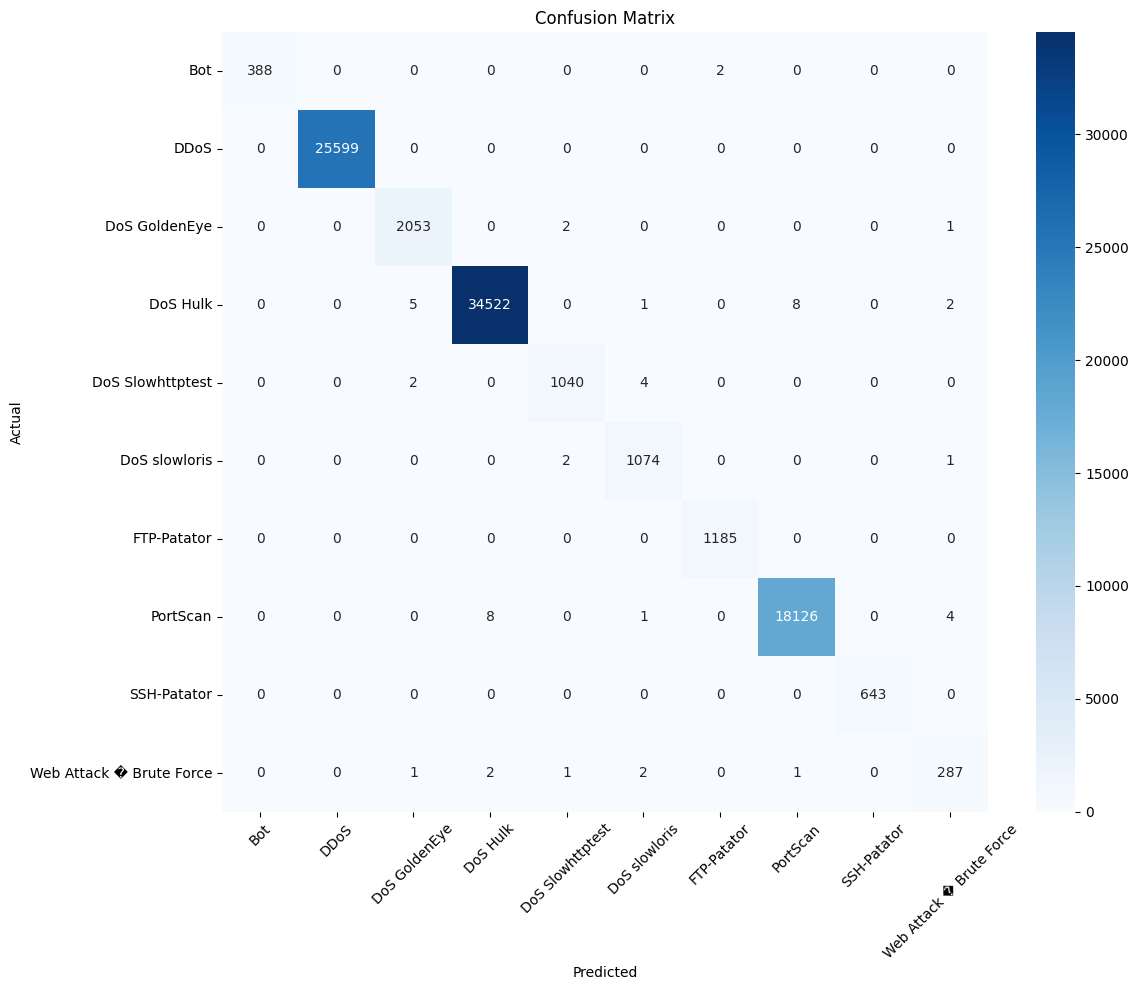

In [63]:
# 11. Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=attack_names, yticklabels=attack_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
import joblib

joblib.dump(tree, "decision_tree_model.pkl")
print("Decision Tree model saved as decision_tree_model.pkl")

Decision Tree model saved as decision_tree_model.pkl


In [65]:
import pandas as pd
import numpy as np
import joblib
import json

lr = joblib.load("decision_tree_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")  

with open("anomaly_sample.json", "r") as f:
    sample = json.load(f)

sample_df = pd.DataFrame(sample)

sample_df = sample_df[X_train.columns]

prediction_encoded = lr.predict(sample_df)[0]

predicted_label = label_encoder.inverse_transform([prediction_encoded])[0]

print(predicted_label)

DoS Hulk
